## Regresión lineal - Conceptos básicos

https://towardsdatascience.com/the-fundamental-algorithms-of-data-science-a00dbe2c953

Vamos a importar el dataset de precios de vivienda en Boston desde scikit-learn

In [1]:
# Preparamos el entorno

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importamos el datasets con el que queremos trabajar
boston = datasets.load_boston()
df = pd.DataFrame(boston.data)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Estos son los nombres de las columnas
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# Se los asignamos a las columnas de nuestro df
df.columns = boston.feature_names

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
df.shape

(506, 14)

In [10]:
# Como es un df hecho para hacer ejercicios de regresión, 
# la columna target es la que nos da los precios de las viviendas (variables objetivo)
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
# Lo metemos como una columna más
df['PRICE'] = boston.target

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'PRICE')

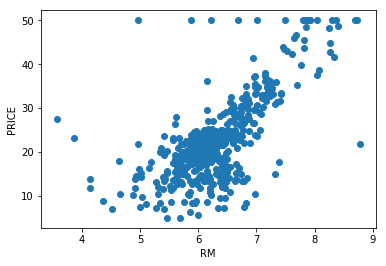

In [23]:
# Vamos a hacer un plot de las dos variables que nos interesan: 
# 'RM' = number of rooms y 'PRICE'
x = df['RM']
y = df['PRICE']

plt.scatter(x,y)
plt.xlabel('RM')
plt.ylabel('PRICE')


Podemos deducir que existe una relación creciente entre el número de habitaciones y el precio de las viviendas.

Parece que se podría dibujar una recta que se aproximase a la forma que tienen estos puntos, de manera que y = h(x) = b0+b1*x

En modelos con una sola variable predictora se puede usar el método del **error cuadrático medio**

In [27]:
b1 = sum((x-x.mean())*(y-y.mean()))/(sum((x-x.mean())**2))
b0 = y.mean()-(b1*x.mean())

In [28]:
(b0,b1)

(-34.67062077643857, 9.102108981180303)

El error cuadrático medio sirve para problemas con una sola variable. 

No obstante, cuando tenemos múltiples variables predictoras tendremos que ir al **descenso por gradiente** para buscar los mínimos globales de nuestras variables.

Derivamos el error cuadrático medio con respecto a b0 y b1 e igualamos a 0 cada expresión

In [38]:
def desc_gradiente(alpha,b0,b1,repet):
    N = df.shape[0]
    for i in range(0,repet):
        y_barra = b0+b1*x
        partial_0 = (1/N)*sum(y_barra-y)
        partial_1 = (1/N)*sum((y_barra-y)*x)
        temp0 = b0-alpha*partial_0
        temp1 = b1-alpha*partial_1
        b0 = temp0
        b1 = temp1
        
    return(b0,b1)

In [41]:
# Para calcular este descenso por gradiente le vamos a hacer que el punto de corte con el eje sea 0, la pendiente
# sea de 1, el paso del descenso por gradiente de 0.01 y el número de repeticiones 40000
desc_gradiente(0.01,0,1,40000)


(-34.3847388892702, 9.057166899185708)

Vemos que nos ha dado un resultado muy parecido al del error cuadrático medio.

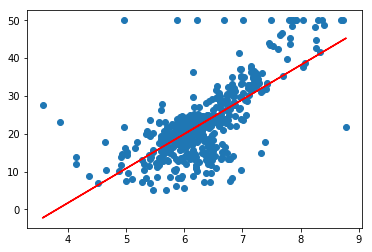

In [42]:
# Ahora queremos plotear la nube de puntos anterior con la recta de regresión lineal
y_barra = b0+b1*x

plt.scatter(x,y)
plt.plot(x,y_barra,color='red')

SKLearn tiene unos módulos que entrenan el modelo siguiendo una regresión lineal. 

Veamos que valores de b0 y b1 obtienen

In [43]:
# Importamos los módulos
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Creamos el objeto de regresión lineal
regr = linear_model.LinearRegression()

In [52]:
# Primero tenemos que tener los datos de la forma X(n_filas, 1 columna) e Y(n_filas)
dataX = pd.DataFrame(x)
x_train = np.array(dataX)
y_train = np.array(y)


In [55]:
x_train.shape

(506, 1)

In [57]:
y_train.shape

(506,)

In [58]:
# Entrenamos el modelo (es decir que a ese modelo de regresión lineal que hemos importado le pasamos nuestros datos)
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
# Hacemos las predicciones de y sobre nuestros valores de x
y_pred = regr.predict(x_train)

In [60]:
y_pred

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [61]:
# Vemos los parámetros de nuestra regresión lineal
print('Coeficiente b1: %.4f' %regr.coef_)
print('Ordenada en el origen b0: %.4f' %regr.intercept_)
print('Error cuadrático medio MSE: %.4f' %mean_squared_error(y_train,y_pred))
print('P-valor R2: %.4f' %r2_score(y_train,y_pred))

Coeficiente b1: 9.1021
Ordenada en el origen b0: -34.6706
Error cuadrático medio MSE: 43.6006
P-valor R2: 0.4835


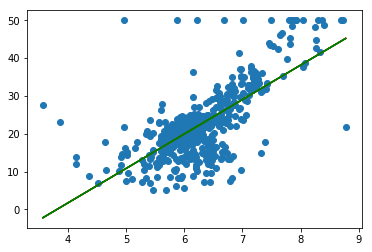

In [62]:
# Vamos a pintar las dos rectas de regresión lineal que hemos obtenido
y_barra = b0+b1*x
y_sklearn = regr.intercept_ + regr.coef_*x

plt.scatter(x,y)
plt.plot(x,y_barra,color='red')
plt.plot(x,y_sklearn, color= 'green')

Vemos que se superponen las dos rectas. Hemos obtenido estimaciones muy similares con los dos métodos.